In [14]:
# Question: Check for missing values, data types, and duplicates in both datasets.

import pandas as pd

# Load the datasets
stock_details = pd.read_csv('StockDetails.csv')
sales = pd.read_csv('sales.csv')

# Check for missing values in StockDetails
print(f"Missing Values in StockDetails Dataset:\n{stock_details.isnull().sum()}")

# Check for missing values in Sales
print(f"Missing Values in Sales Dataset:\n{sales.isnull().sum()}")

# Display data types of each column
print(f"Data Types in StockDetails:\n{stock_details.dtypes}")
print(f"Data Types in Sales:\n{sales.dtypes}")

# Identify duplicate rows in each dataset
print(f"Duplicate Rows in StockDetails:\n{stock_details[stock_details.duplicated()]}")
print(f"Duplicate Rows in Sales:\n{sales[sales.duplicated()]}")

# Display duplicate counts for both datasets
print(f"Duplicate count in StockDetails: {stock_details.duplicated().sum()}")
print(f"Duplicate count in Sales: {sales.duplicated().sum()}")


Missing Values in StockDetails Dataset:
StockCode      0
Description    0
dtype: int64
Missing Values in Sales Dataset:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Data Types in StockDetails:
StockCode      object
Description    object
dtype: object
Data Types in Sales:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object
Duplicate Rows in StockDetails:
Empty DataFrame
Columns: [StockCode, Description]
Index: []
Duplicate Rows in Sales:
     InvoiceNo StockCode                          Description  Quantity  \
292     538174     22326  ROUND SNACK BOXES SET OF4 WOODLAND         12   
1132    542106     20676                   RED RETROSPOT BOWL        24   
3232    553731     23208        LUNCH BAG VINTAGE LEAF DESIGN        10   
3626    5

In [133]:
# Convert InvoiceDate into datetime, and extract: 
#    •	Invoice date 
#    •	Month 
#    •	Hour of transaction

import pandas as pd

# Load the datasets
sales = pd.read_csv('sales.csv')

# Handle missing values
# Fill missing values within each Invoice group — forward-fill first, then backward-fill — 
# ensuring data is propagated only inside the same invoice (no leakage across different invoices).
sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)



# Convert InvoiceDate to datetime.
# Note: pandas uses month-first by default (dayfirst=False).
# Our dataset uses day-first format (DD-MM-YYYY HH:MM), so we specify the format.
sales['InvoiceDate'] = pd.to_datetime(
    sales['InvoiceDate'],
    # default behaviour of pandas is month-first however, in our data set has day-first in the invoice date
    # hence formating the data to maintain the consistancy 
    format= '%d-%m-%Y %H:%M', 
    errors='coerce' # convert unparseable strings to NaT (Not a Time) rather than raising an error
)

# Extract the required components
sales['InvoiceDateOnly'] = sales['InvoiceDate'].dt.date # date only (YYYY-MM-DD)
sales['InvoiceMonth'] = sales['InvoiceDate'].dt.month # month as integer 1-12
sales['HourOfTransaction'] = sales['InvoiceDate'].dt.hour # hour 0-23

# Display First few rows of the converted columns
display(sales[['InvoiceDate', 'InvoiceDateOnly', 'InvoiceMonth', 'HourOfTransaction']].head())

/var/folders/vf/rst47yl90f74cf3frj58cvw00000gn/T/ipykernel_1103/93774672.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


,InvoiceDate,InvoiceDateOnly,InvoiceMonth,HourOfTransaction
0,2010-12-01 13:04:00,2010-12-01,12,13
1,2010-12-01 13:04:00,2010-12-01,12,13
2,2010-12-01 13:04:00,2010-12-01,12,13
3,2010-12-01 13:04:00,2010-12-01,12,13
4,2010-12-01 13:04:00,2010-12-01,12,13


In [134]:
# Add a new column TotalPrice = Quantity × UnitPrice.
import pandas as pd
# Load the datasets
sales = pd.read_csv('sales.csv')

# Handle missing values
# Fill missing values within each Invoice group — forward-fill first, then backward-fill — 
# ensuring data is propagated only inside the same invoice (no leakage across different invoices).
sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)

#Compute TotalPrice - This will add a new column to the data set
sales['TotalPrice'] = (sales['Quantity'] * sales['UnitPrice']).round(2) # Rounding off with 2 decimal places

# Display First few rows with computed total price
display(sales.head(5))


/var/folders/vf/rst47yl90f74cf3frj58cvw00000gn/T/ipykernel_1103/4041130465.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,01-12-2010 13:04,2.95,12662,Germany,17.7
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,01-12-2010 13:04,2.55,12662,Germany,15.3
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,01-12-2010 13:04,0.85,12662,Germany,10.2
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,01-12-2010 13:04,1.65,12662,Germany,19.8
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,01-12-2010 13:04,1.95,12662,Germany,23.4


In [140]:
# Identify the top 3 bestselling items by quantity sold.

import pandas as pd

# Load the datasets
sales = pd.read_csv('sales.csv')

# Handle missing values
# Fill missing values within each Invoice group — forward-fill first, then backward-fill — 
# ensuring data is propagated only inside the same invoice (no leakage across different invoices).
sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)

# Group the data to compute the Total Quantity
top_3_by_stock_code = (sales.groupby('StockCode')['Quantity'].sum() ## Group the Quantity by StockCode and sum the quantity
                       .reset_index(name='TotalQuanity') # Reset the index, in such away that, the new computed column `TotalQuantity` is the index
                       .sort_values('TotalQuanity', ascending=False) # Sort the TotalQuantity in Decending order
                       .head(3)) # limit top 3 rows

# Display the manipulated result                   
display(top_3_by_stock_code)

/var/folders/vf/rst47yl90f74cf3frj58cvw00000gn/T/ipykernel_1103/2044693881.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


,StockCode,TotalQuanity
597,22326,1218
5,15036,1164
1670,POST,1104


In [ ]:
# Find out how many unique customers made purchases and the average quantity per invoice.

import pandas as pd

# Load the datasets
sales = pd.read_csv('sales.csv')

# Unique Customers
unique_customers = sales['CustomerID'].nunique()
# Average Quntity per invoice
# Sum() -> to get quanity per invoice 
# mean() -> to get the average 
average_quanity_per_invoice = sales.groupby('InvoiceNo')['Quantity'].sum().mean()

metrics = pd.DataFrame({
    'unique_customers': [unique_customers],
    'average_quanity_per_invoice': [average_quanity_per_invoice]
})
# Display the result
display(metrics)

,unique_customers,average_quanity_per_invoice
0,95,194.772803


<Figure size 1000x600 with 0 Axes>

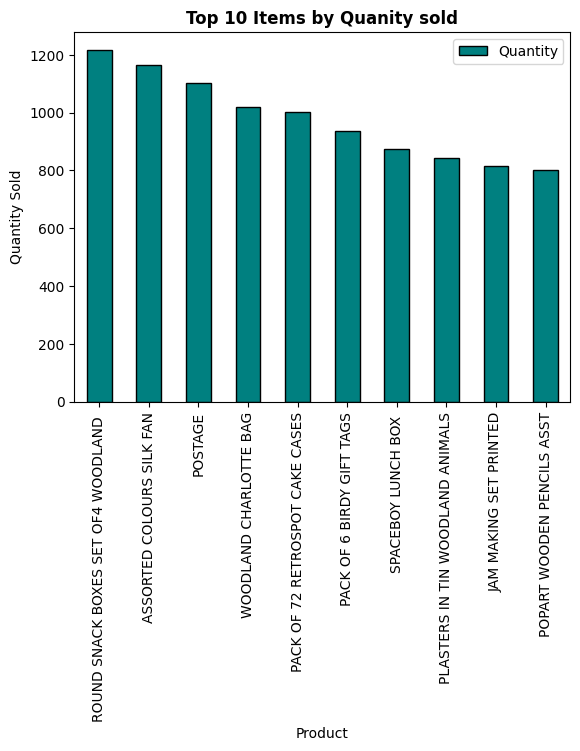

In [ ]:
# Plot a bar chart of top 10 items by quantity sold.

import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
sales = pd.read_csv('sales.csv')


# Group the sales data by description
top_10_items = (
    sales
    .groupby('Description') # Group by description 
    .agg({ 'Quantity': 'sum'}) # Sum the Quantity
    .sort_values(by='Quantity', ascending=False) # Sort by highest revenue
    .head(10) # Limit top 10 items
)


plt.figure(figsize=(10, 6))
top_10_items.plot(
    kind='bar', # Kind of the char would be bar
    color='teal',
    edgecolor='black',
)

plt.title('Top 10 Items by Quanity sold', fontweight='bold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')


plt.show()


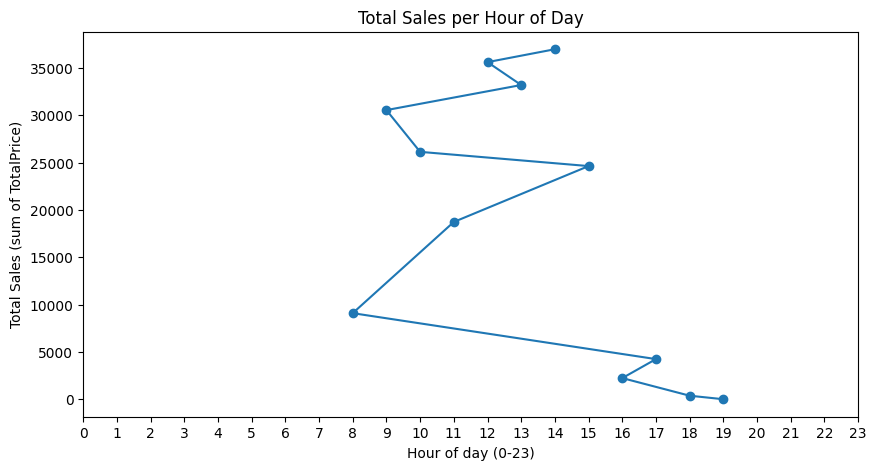

In [ ]:
# Plot total sales per hour of the day to understand peak shopping hours.

import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
sales = pd.read_csv('sales.csv')

# Covert the Invoice data to datetime
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'], format='%d-%m-%Y %H:%M',errors='coerce')

# Extract the hour from the date time object of invoice date
sales['InvoiceHours'] = sales['InvoiceDate'].dt.hour

# Multiple UnitPrice and Quntity to derive the total price
# With apply function, using lambda computing the total price 
# using axis = 1, to apply the function across each row
sales['TotalPrice'] = sales.apply(lambda row: row['UnitPrice'] * row['Quantity'], axis=1)

# Group the sales data by invoice hours, and sum the total price
# InvoiceHours should not be the index, hence using as_index=False
# sort the values by decending order
hourly_data = sales.groupby('InvoiceHours', as_index=False)['TotalPrice'].sum().sort_values('TotalPrice', ascending=False)

# Figure layout = 10 rows 5 columns
plt.figure(figsize=(10, 5))

# Plot the chart
plt.plot(hourly_data['InvoiceHours'], hourly_data['TotalPrice'], marker='o')
# In a day, we have 24 hours; hence customizing the x-axis tick marks
plt.xticks(range(0, 24))
plt.xlabel('Hour of day (0-23)')
plt.ylabel('Total Sales (sum of TotalPrice)')
plt.title('Total Sales per Hour of Day')
plt.show()


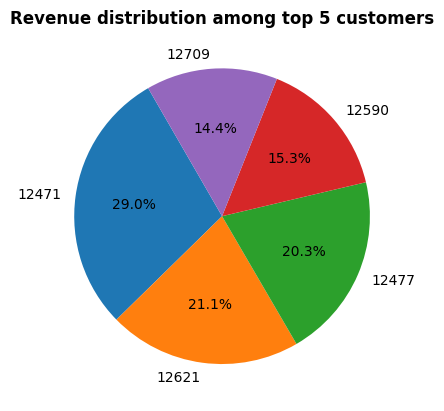

In [15]:
# Create a pie chart showing revenue distribution among top 5 customers.

import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
sales = pd.read_csv('sales.csv')

# Handling Missing Values
# Forward fill (propagate previous valid value)
sales = sales.ffill()

# Calulate Total revenue 
# assign() method is used to add new columns (or modify the exisiting columns)
sales = sales.assign(TotalRevnue = round(sales['UnitPrice'] * sales['Quantity'], 2))


# Group the sales data by CustomerId, and sum the TotalRevnue
# CustomerID should not be the index, hence using as_index=False
# sort the values by decending order
# Limit to 5
# this result in revenue distribution among top 5 customers.
customer_revenue = (
    sales.groupby('CustomerID', as_index=False)['TotalRevnue'].sum() 
    .sort_values('TotalRevnue', ascending=False)
    .head(5)
)

plt.pie(
    customer_revenue['TotalRevnue'],
    labels= customer_revenue['CustomerID'],
    autopct='%1.1f%%',       # Show % inside each slice
    startangle=120 # Start angle of first slice
)
plt.title('Revenue distribution among top 5 customers', fontweight='bold')

plt.show()

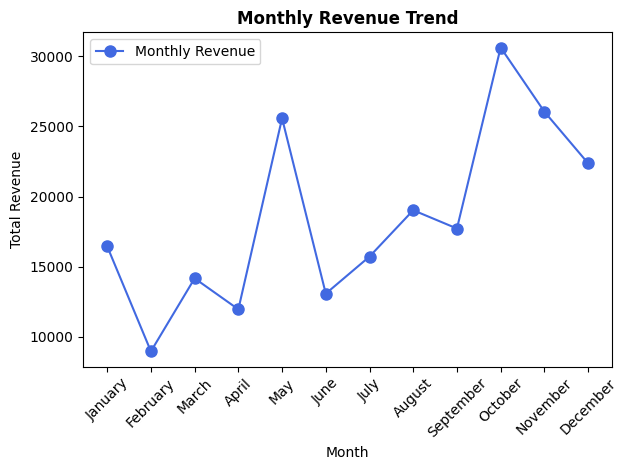

In [ ]:
# Visualise the monthly revenue trend using a line chart.

import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
sales = pd.read_csv('sales.csv')

# Handling Missing Values
# Forward fill (propagate previous valid value)
sales = sales.ffill()

# Create a new column called Month and TotalRevenue
# assign() method is used to add new columns (or modify the exisiting columns)
sales = (
    sales.assign(
        # Invoice data is string, hence we are coverting to datetime using pd.to_datetime
        # provided dataset having dayfirst, however, pandas default is monthfirst 
        # hence we are setting dayfirst=Ture
        # convert unparseable strings to NaT (Not a Time) rather than raising an error
        # Get the name of the month for better readablity instead of numerical values
        Month = pd.to_datetime(sales['InvoiceDate'], dayfirst=True, errors='coerce').dt.month_name(),
        # Multiply Unit Price and Quanity to derive the total revenue
        # Round off the resultant value to 2 decimal points
        TotalRevenue = round(sales['UnitPrice'] * sales['Quantity'], 2)
    )
)

#by default, groupby('Month') won’t plot the months in chronological order
revenue_trend = sales.groupby('Month', as_index=False)['TotalRevenue'].sum()

# Ensuring months in calendar order, not alphabetically
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure months follow calendar order (Jan–Dec) instead of alphabetical
# pd.Categorical - Convert 'Month' column into an ordered categorical type
# categories - Set the allowed month values and their calendar order (Jan–Dec)
revenue_trend['Month'] = pd.Categorical(revenue_trend['Month'], categories=month_order, ordered=True)

# Sort the values based on month
revenue_trend = revenue_trend.sort_values('Month')

plt.plot(
    revenue_trend['Month'], # X-Axis values
    revenue_trend['TotalRevenue'], # Y-Axis Value
    marker='o', # Adding a maker for better visibility
    label='Monthly Revenue',  # Setting a label for identification,
    color='royalblue',
    markersize=8
)

plt.title('Monthly Revenue Trend',fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45) # Rotating the x lables by 45 degree for readability
plt.legend(loc='upper left', fontsize=10) # place the ledgend/label on the plot

plt.show()

/var/folders/vf/rst47yl90f74cf3frj58cvw00000gn/T/ipykernel_1103/2840904152.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


<Figure size 1200x600 with 0 Axes>

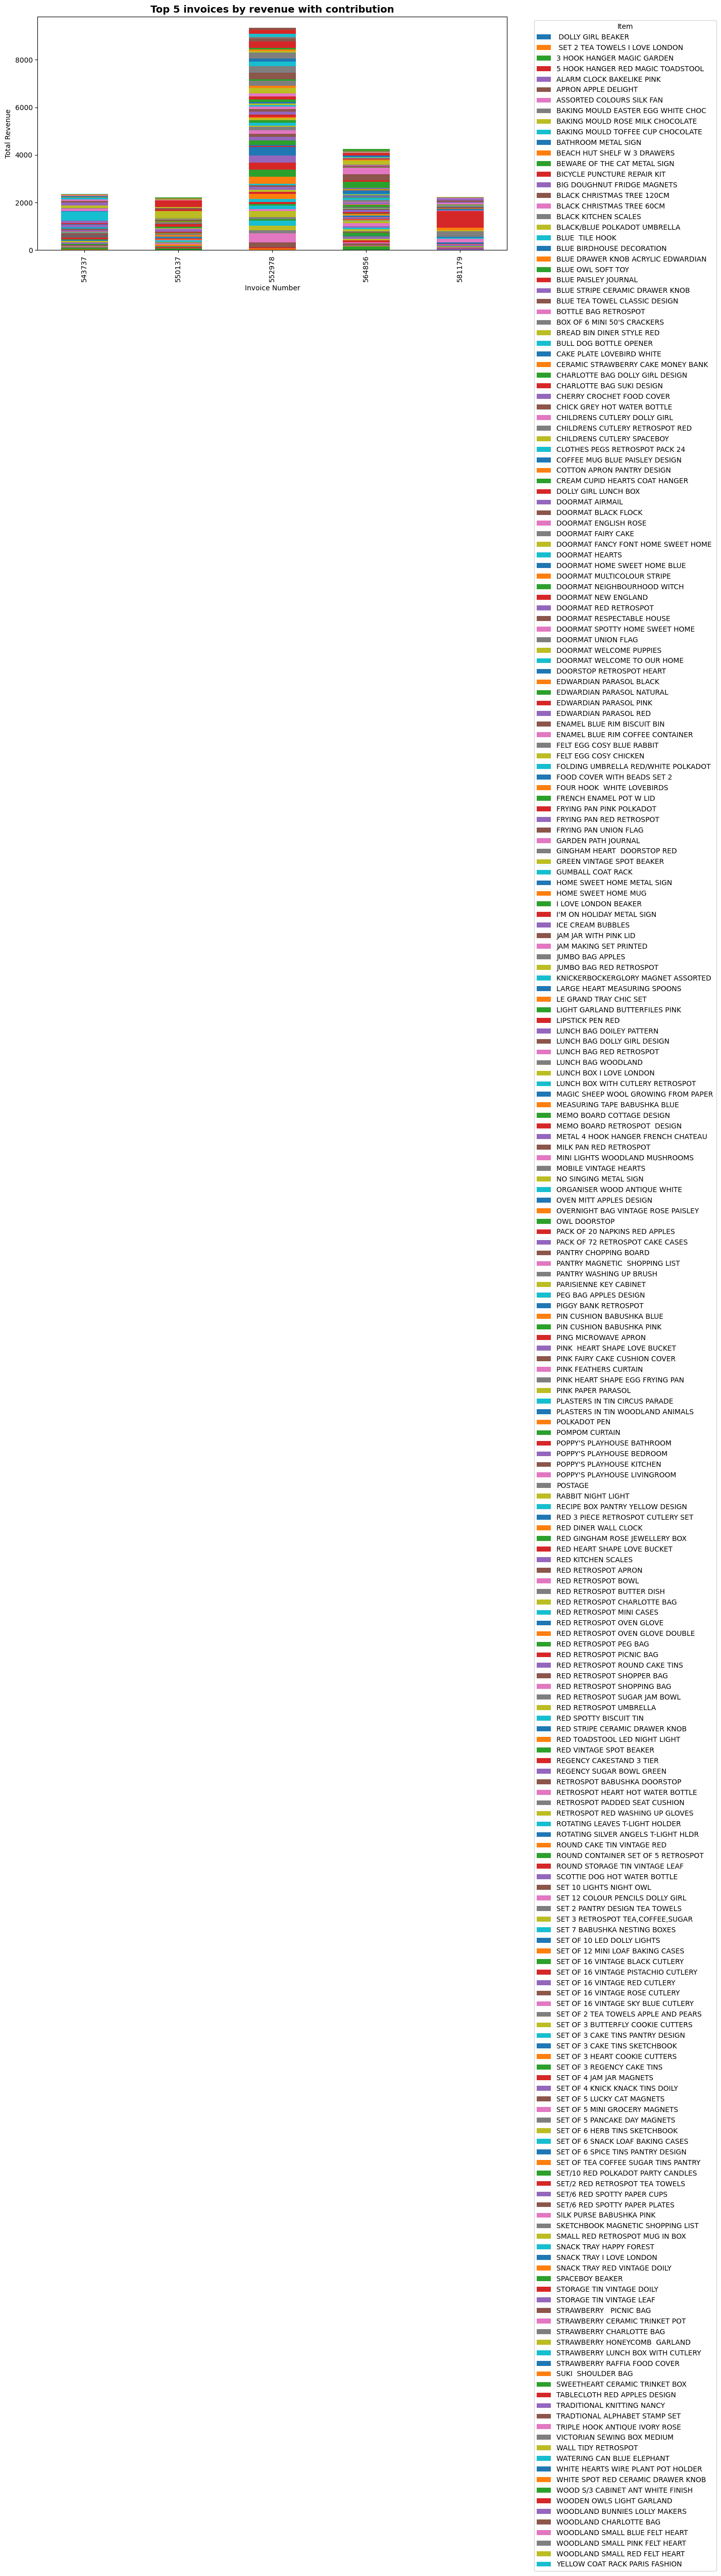

In [141]:
# Create a stacked bar chart of top 5 invoices by revenue, showing contribution from each item.

import pandas as pd

# Load dataset
sales = pd.read_csv('sales.csv')

# Handle missing values
# Fill missing values within each Invoice group — forward-fill first, then backward-fill — 
# ensuring data is propagated only inside the same invoice (no leakage across different invoices).
sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


# Calculate total revenue per item
sales['TotalRevenue'] = round(sales['UnitPrice'] * sales['Quantity'], 2)

# Find top 5 invoices by total revenue
top_invoices = sales.groupby('InvoiceNo')['TotalRevenue'].sum().nlargest(5).index

# Filter data for top 5 invoices
top_sales = sales[sales['InvoiceNo'].isin(top_invoices)]

# Group the Invoice Number and Description by summing total revenue 
invoice_item = top_sales.groupby(['InvoiceNo', 'Description'])['TotalRevenue'].sum()

# Reset the index to the actuals
invoice_item = invoice_item.reset_index()

# Create a pivot table in such a way that index would be InvoiceNo, Name of the column is Description 
# and its value as TotalRevenue
sales_pivot = invoice_item.pivot(index='InvoiceNo', columns='Description', values='TotalRevenue').fillna(0)
# Size of the image - 12" wide and 6" tall
plt.figure(figsize=(12, 6))

# Plot stacked bar chart
sales_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adjust the chat attributes
plt.legend(title='Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Top 5 invoices by revenue with contribution', fontweight='bold', fontsize=14)
plt.xlabel("Invoice Number")
plt.ylabel("Total Revenue")
plt.show()

In [142]:
# Identify which product generates the highest total revenue.

import pandas as pd

# Load dataset
sales = pd.read_csv('sales.csv')

# Handle missing values
# Fill missing values within each Invoice group — forward-fill first, then backward-fill — 
# ensuring data is propagated only inside the same invoice (no leakage across different invoices).
sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


# Create a new column called TotalRevenue
# assign() method is used to add new columns (or modify the exisiting columns)
sales = sales.assign(TotalRevenue = round(sales['UnitPrice'] * sales['Quantity']))

# sort the total revenue by decending order, limit it 1 to derive the top product that generate highest revenue
top_product = sales.sort_values('TotalRevenue', ascending=False).head(1)

display(top_product)

/var/folders/vf/rst47yl90f74cf3frj58cvw00000gn/T/ipykernel_1103/1327366910.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
6426,569640,22423,REGENCY CAKESTAND 3 TIER,80,05-10-2011 12:25,10.95,12471,Germany,876.0


In [ ]:
# Determine average order value per invoice.

import pandas as pd

# Load dataset
sales = pd.read_csv('sales.csv')

# Handle missing values
# Fill missing values within each Invoice group — forward-fill first, then backward-fill — 
# ensuring data is propagated only inside the same invoice (no leakage across different invoices).
sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)

# Create a new column called TotalRevenue
# assign() method is used to add new columns (or modify the exisiting columns)
sales = sales.assign(TotalRevenue = round(sales['UnitPrice'] * sales['Quantity']))

# Group TotalRevenue by Invoice number to compute average order value per invoice
aov_per_invoice = sales.groupby('InvoiceNo', as_index=False)['TotalRevenue'].sum()

display(aov_per_invoice)

overall_aov = aov_per_invoice['TotalRevenue'].mean()

print(f"Average Order Value (Overall): {overall_aov:.2f}")


/var/folders/vf/rst47yl90f74cf3frj58cvw00000gn/T/ipykernel_1103/1922966635.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


,InvoiceNo,TotalRevenue
0,536527,262.0
1,536840,154.0
2,536861,304.0
3,536967,76.0
4,536983,175.0
...,...,...
598,C580313,-30.0
599,C580714,-15.0
600,C580740,-35.0
601,C580989,-2.0


Average Order Value (Overall): 367.58


In [ ]:
# Find the customer with the highest number of transactions.

# Load dataset
sales = pd.read_csv('sales.csv')

# Handle missing values
# Fill missing values within each Invoice group — forward-fill first, then backward-fill — 
# ensuring data is propagated only inside the same invoice (no leakage across different invoices).
sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)

# Count number of invoices (transactions) per customer
customer_txn_count = sales.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='TransactionCount')

# Store the max id which has the max transactions
max_id = customer_txn_count['TransactionCount'].idxmax()

# Find the customer with the highest number of transactions
top_customer = customer_txn_count.loc[max_id]

# display the results
display(top_customer)



/var/folders/vf/rst47yl90f74cf3frj58cvw00000gn/T/ipykernel_1103/2034513437.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales = sales.groupby('InvoiceNo').apply(lambda x: x.ffill().bfill()).reset_index(drop=True)


CustomerID          12471
TransactionCount       49
Name: 3, dtype: int64

3

In [177]:
# Check how many products in the sales data do not have a matching entry in the stockDetails file.

import pandas as pd

# Load both data sets 
sales = pd.read_csv('sales.csv')
stock = pd.read_csv('StockDetails.csv')

# Handle missing values before comparison
# Drop rows with missing product codes
sales = sales.dropna(subset='StockCode')
stock = stock.dropna(subset='StockCode')

# Find unmatched products
unmatched_products = sales[~sales['StockCode'].isin(stock['StockCode'])]

# Count unique unmatched product codes
unmatched_count = len(unmatched_products)

print(f"Number of products in sales not matching is stock details is {unmatched_count}")

Number of products in sales not matching is stock details is 0
